# Objective 
- Using the Haberman's Cancer Survival dataset we need to predict whether the patient will survive the cancer or not based on the features.
- Find no of classes , features, datapoints per class
- Performing Univariate analysis (PDF, CDF, Boxplot , voilin plots) to understand which features are useful towards classification.
- Performing bi- variate analysis (scatter plots, pair-plots) to see if combination of features are useful in classification.
- Quantifying the results and writing observations for each section of analysis. 


In [50]:
"""
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings 
Hospital on the survival of patients who had undergone surgery for breast cancer.

"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
data = pd.read_csv('haberman.csv')

In [23]:
data.shape
## 305 rows and 4 cols/attributes so total number of observations = 305

(305, 4)

In [48]:
"""
Attribute Information:

a) Age of patient at time of operation (numerical)
b) Patient's year of operation (year - 1900, numerical)
c) Number of positive axillary nodes detected (numerical)
d) Survival status (class attribute):
     1 = the patient survived 5 years or longer
     2 = the patient died within 5 year
"""
data.columns
#The class label is Surv_status

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [30]:
data.isnull().sum()
## There are no null values here.

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

In [31]:
data.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [46]:
"""
Survival status (class attribute):
     1 = the patient survived 5 years or longer
     2 = the patient died within 5 year
"""
data['Surv_status'].value_counts()

# Out of 305 patients 224 patients belong to class 1 and 81 patients belong to class 2
# No of patients who survived 5 years or longer = 224
# No of patients who died within 5 years  = 81
# So there are two classes for which the patients needs to be predicted (1 and 2)

1    224
2     81
Name: Surv_status, dtype: int64

In [26]:
data.head()
## By seeing the below data: Number of Attributes = 4 (including the class attribute - surv_status)

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [47]:
data.tail()

,Age,Op_Year,axil_nodes,Surv_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [40]:
#creating a data frame from existing dataframes for class == 1.
data_1 = data.loc[data['Surv_status'] == 1]
data_1.head()


,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [42]:
#creating a data frame from existing dataframes for class == 2.
data_2 = data.loc[data['Surv_status'] == 2]
data_2.head()

,Age,Op_Year,axil_nodes,Surv_status
6,34,59,0,2
7,34,66,9,2
23,38,69,21,2
33,39,66,0,2
42,41,60,23,2


In [43]:
data_1.describe()
"""
From below data we see that the patient who survived 5 or longer have an average age of 52 years, max (age, nodes) of 
(77 yrs, 46) and min (age, nodes) of (30 years, 0). 
"""

,Age,Op_Year,axil_nodes,Surv_status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [81]:

"""
From below data we see that the patient who survived less than 5 yrs have an average age of 53 years, max (age,nodes) of 
(83 yrs , 52) and min (age, nodes) of (34 years, 0) 
"""
data_2.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Univariate_Analysis
- Whenever doing an analysis (be it CDF , PDF, Box plots, violin plots ) by taking one feature/variable  at a time then it is 
called univariate analysis.


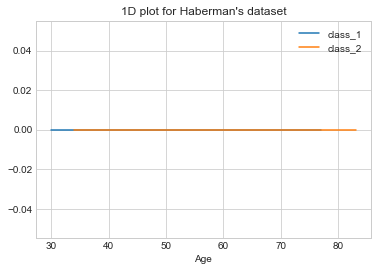

In [83]:
## 1D plot of Age_of_patients vs y axis filled with zeros
##The zeros_like() function is used to get an array of zeros with the same shape and type as a given array.

plt.plot(data_1['Age'], np.zeros_like(data_1['Age']), label = 'class_1')
plt.plot(data_2['Age'], np.zeros_like(data_2['Age']), label = 'class_2')
plt.xlabel('Age')
plt.legend()
plt.title("1D plot for Haberman's dataset")
plt.show()

#See below that all the y values are taken to be zero as it is 1D plot"

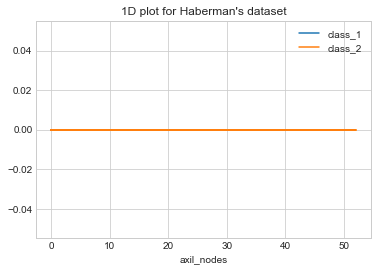

In [64]:
## 1D plot of axil_nodes vs y axis filled with zeros
plt.plot(data_1['axil_nodes'], np.zeros_like(data_1['axil_nodes']), label = 'class_1')
plt.plot(data_2['axil_nodes'], np.zeros_like(data_2['axil_nodes']), label = 'class_2')
plt.xlabel('axil_nodes')
plt.legend()
plt.title("1D plot for Haberman's dataset")
plt.show()


### Observation
- Form the above plots we can see that we cannot tell how many number of points are there for a particular feature so better to use histogram for univariate analysis and then come to conclusion that which feature is best for classification.
- Note that for univariate analysis Histogram plots are the best like here in our case we have 3 features and to find which one feature has significant impact on the output of the model we can use histogram plots for univariate analysis

## Histogram on Age of patients

C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


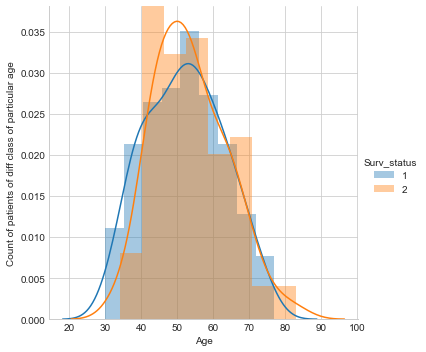

In [68]:
sns.FacetGrid(data, hue = 'Surv_status', size = 5) \
.map(sns.distplot, 'Age') \
.add_legend()

plt.ylabel('Count of patients of diff class of particular age')
plt.show()

### Observation 
- From the above plot we can see that the pdf of both the classes have significant overlapp if we choose age as a feature therefore age can determine wether a patient is gonna leave longer or not

## Histogram on axil_nodes

C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


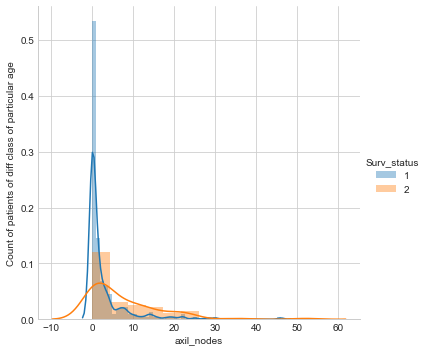

In [67]:
sns.FacetGrid(data, hue = 'Surv_status', size = 5) \
.map(sns.distplot, 'axil_nodes') \
.add_legend()

plt.ylabel('Count of patients of diff class of particular age')
plt.show()

### Observation 
- From this plot we can see that if the patient has lesser no of nodes then chances of survival of the patient is longer.
- we can take the intersection of two pdf's as a threshold (here thresh[AN(axil_node)] = 3) for classification. Althouh there will be an overlapp of pdf's leading to misclassification.
- we can have a model like if {-1<AN<=0 then class 1} elif {AN > 0 and AN < 3 then chances of survival is high) else {The survival of patient is less than 5 years i.e. class 2} 

## Histogram on Year_of_operation

C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Abhishek Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


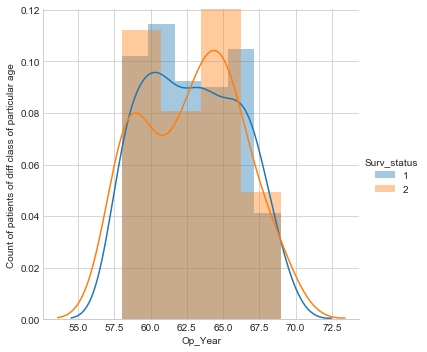

In [69]:
sns.FacetGrid(data, hue = 'Surv_status', size = 5) \
.map(sns.distplot, 'Op_Year') \
.add_legend()

plt.ylabel('Count of patients of diff class of particular age')
plt.show()

In [ ]:
## Using op_year as a feature is a bad idea because PDF of both of the class nearly overlap each other

### Overall Observation from 1D plots
- Best feature to make a classification model is axil_nodes as there is less overlap of PDF's as compared to other features
- The feature not to be used is Op_Year.

## CDF 
- plotting the cummulative plot for our best selected feature - axil_nodes

pdf values for class_1: [0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
bin_edges of class_1 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf values for class_2: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
bin_edges of class_2 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


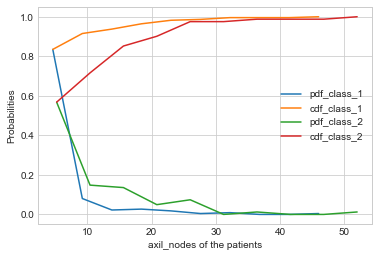

In [72]:
#Pdf_Cdf_class1
counts , bin_edges = np.histogram(data_1['axil_nodes'], bins = 10, density = True)
pdf = counts/(sum(counts))
print("pdf values for class_1:",pdf)
print("bin_edges of class_1",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf_class_1')
plt.plot(bin_edges[1:], cdf,label = 'cdf_class_1')
# plt.legend()
# plt.xlabel("petal length of virginica flowers (in cm)")
# plt.ylabel("Probabilities")

#pdf_cdf_class2
counts , bin_edges = np.histogram(data_2['axil_nodes'], bins = 10, density = True)
pdf = counts/(sum(counts))
print("pdf values for class_2:",pdf)
print("bin_edges of class_2",bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf_class_2')
plt.plot(bin_edges[1:], cdf,label = 'cdf_class_2')
# plt.legend()

plt.xlabel("axil_nodes of the patients")
plt.ylabel("Probabilities")
plt.legend()
plt.show()

### Observation
- From the above cdf plot we can confirm that if no of nodes are less then chances of survival for the patients is longer i.e. class 1. 
- Cdf of class_2 (in red ) at the start shows that there are 55% of the (short survival) patients if AN <= 3. But there are nearly 100% of people in short survival (class_2) if nodes(AN) are >= 40.
- For ex: there are 85% of the patients from class 1 if AN <=3 (Long Survival. And as the no of nodes increases chances of survival also decreases which is confirmed by the cdf of class_2 which can be see in red color (see AN >25).

# Stats for axillary nodes feature
- Mean
- Median
- std
- percentiles
- quantiles
- Mean Absolute deviation


In [73]:
## Mean
# print("Mean_age_class_1:",np.mean(data_1['Age']))
print("Mean_nodes_class_1:",np.mean(data_1['axil_nodes']))
# print("Mean_age_class_2:",np.mean(data_2['Age']))
print("Mean_nodes_class_2:",np.mean(data_2['axil_nodes']))

Mean_nodes_class_1: 2.799107142857143
Mean_nodes_class_2: 7.45679012345679


In [74]:
## Median
# print("Median_age_class_1:",np.median(data_1['Age']))
print("Median_nodes_class_1:",np.median(data_1['axil_nodes']))
# print("Median_age_class_2:",np.median(data_2['Age']))
print("Median_nodes_class_2:",np.median(data_2['axil_nodes']))

Median_nodes_class_1: 0.0
Median_nodes_class_2: 4.0


In [75]:
##Std
# print("Standard_Deviation_class1:", np.std(data_1['Age']))
print("Standard_Deviation_class1:", np.std(data_1['axil_nodes']))
# print("Standard_Deviation_class2:", np.std(data_2['Age']))
print("Standard_Deviation_class2:", np.std(data_2['axil_nodes']))

Standard_Deviation_class1: 5.869092706952767
Standard_Deviation_class2: 9.128776076761632


### Observation_1
- Standard deviation for Long survival = 5.87 and for Short survival = 9.13, means the spread of data for short survival is more.
- Median (central value) for class_1 is less than that of class_2 which means that patients who have nodes >=4 has chances of less survival

In [79]:
#90th percentile
print('\nPercentile')
print(np.percentile(data_1['axil_nodes'],90))
print(np.percentile(data_2['axil_nodes'],90))


print("\nQuantiles")
# the below code means get me the percentile values between 0 to 100 with a gap 25 i.e [0th, 25th, 50th, 75th] percentile values 
print(np.percentile(data_1['axil_nodes'], np.arange(0,100,25))) 
print(np.percentile(data_2['axil_nodes'], np.arange(0,100,25)))

from statsmodels import robust
print("\nMean Absolute Deviation:")
print(robust.mad(data_1['axil_nodes']))
print(robust.mad(data_2['axil_nodes']))

"MAD intution is same as that of standard deviation"
"IQR(Inter Quartile range) = [75th percentile value - 25th percentile value] where 505 of the data lies"




Percentile
8.0
20.0

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Mean Absolute Deviation:
0.0
5.930408874022408


'IQR(Inter Quartile range) = [75th percentile value - 25th percentile value] where 505 of the data lies'

### Observation_2
- From quantiles of long survival (class_1) we see that there are 75% of the paptients who have nodes less than or equal to 3 and rest 25 % of the patients have nodes more than 3
- Here MAD also confirms that the spread in the data of nodes of the short survival patients are more as compared to long survival patients

## Box Plot and Whishkers
- Box plot with whiskers: another method of visualising the 1D scatter plot . 
- Whiskers in the plot below not necessarily correspond to the min and max values. 
- Box plots takes the ideas of mean ,medians and Quartiles and puts everything in the plot form.

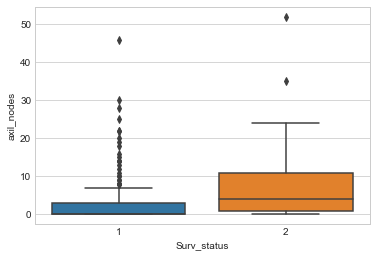

In [86]:
sns.boxplot(x = 'Surv_status', y = 'axil_nodes', data = data)
plt.show()

### Observation
- In the above plot the middle line in the boxes represent 50th percentile value , the upper limit of the box represent 75th percentile value and lower limit represent 25th percentile value for axil nodes .
- The small points above that vertical T shaped bar are outliers.
- Max axil_node for patient of class_1 = 46 whereas Max axil_node for patient of class_2 = 52 . This we got by seeing the star marks at the top of whiskers.
- 50th percentile value (median) for the axil nodes of class_1 patient = 0 and 50th percentile value (median) for the axil nodes of class_2 patient = 4

## Violin plot
- Violin plot is a combination of pdf(probability density function) plot and box plot.
- Denser regions of the data are fatter and sparser ones thinner in a violin plot.

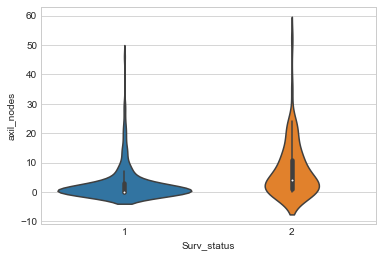

In [89]:
sns.violinplot(x = 'Surv_status', y = 'axil_nodes', data = data, size = 10)
plt.show()

### Observation
- For long survival (class_1) density of axil_nodes is more near the 0 nodes and also it has whiskers in range o-7 
- For short survival (class_2) density of axil_nodes is more in  0 - 15 nodes.

# Bivariate Analysis

## 2D Scatter_Plot

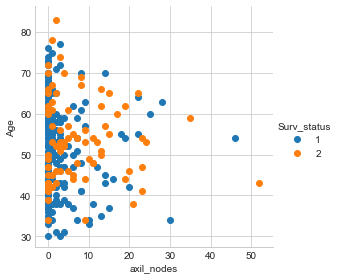

In [70]:
## 2D scatter plot with color coding for each class using seaborn as sns
sns.set_style('whitegrid');
sns.FacetGrid(data, hue = 'Surv_status', size = 4) \
   .map(plt.scatter, 'axil_nodes','Age' ) \
   .add_legend();
plt.show()
  

### Observation:
- we can see that most of the patients who died within 5 years (class 2) were of the age 40 -70 yrs although its not accurate as age is not a deciding factor for classification as we have seen above.
- For better understaing the plots for each pair of features we move towards the pair plots.


## Pair Plots

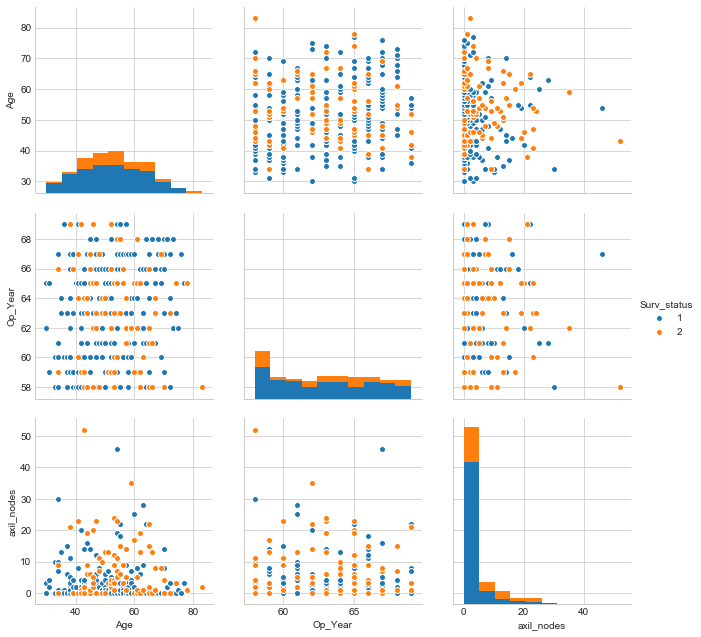

In [61]:
# Pairwise scatter plot is called pair plot. Since there are three features so no of pair plots are 3C2 = 3
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data = data ,hue = "Surv_status", size = 3, vars=['Age','Op_Year', 'axil_nodes'] ); ## color the plot based on Surv_status label
plt.show()

## In below plot the diagonal plots are the prob density functions i.e. the PDF's
## see the below plots in matrix forms as the y labels are on the lefthand side and the xlabels are at bottom side
## and there are 3 uniques plots below the diagonal  plots and the symmetric plots above the diagonal plots
## we will analyse the 3 unique plots which are above the diagonal plots (viz Age vs Op_year, Age vs axil_nodes, Op_year  vs axil_nodes)

### Observation
- Analysing the pair plot we see that if one of the feature is op_year then it is not useful for classification. Like see the plot 2 the data is not well separated as we cannot say that whether orange point is above blue point or vice versa.
- we can consider plot 3 as the best plot among the existing plots as there is some data which is separable although there is significant amount of overlap.
- Best two features among existing = (Age, axil_nodes)


# Multivariate probability density, contour plot.
- In Contour plot the darker color means that the height is much more than the heigth represented by light color.
- The points at the same circle represents that they are of the same height. 
- In contour plot there are univarite pdf's of a feature on top and right of the contour plot.


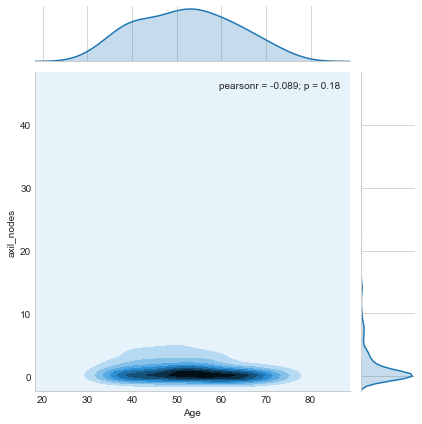

In [90]:
# 2D Density plot, contour-plot for class_1 (long survival patients)
sns.jointplot(x = 'Age', y = 'axil_nodes', data = data_1 , kind = 'kde', size = 6)
plt.show();


### Observation
- The above is the 2D density plot for long survival patients using feature age and axillary nodes
- Density of points for long survival patients are more for age feature in the range 47–60 and for axillary nodes feature in the range of 0–3.
- The dark area have major density points which can be examined as a hill top and the density is getting low as the graph gets lighter.